In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
import numpy
numpy.version.version

'1.23.3'

In [3]:
import scipy
scipy.version.version

'1.9.1'

In [4]:
df = pd.read_csv('Visadataset.csv')
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


### 2.Hypothesis Testing

#### 2.1 Checking correlation

In [5]:
df.corr()

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


In [6]:
nums_feat = [cols for cols in df.columns if df[cols].dtype!='O']

In [7]:
nums_feat

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

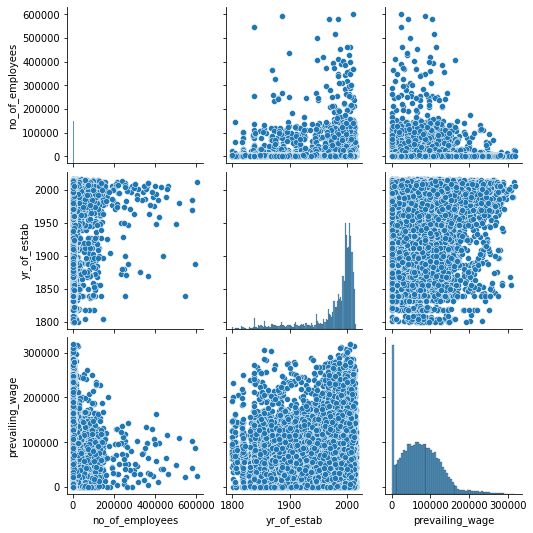

In [8]:
sns.pairplot(df.iloc[:,4:9])

In [9]:
num_df = df[nums_feat]

#### 2.2 Shapiro Wick Test
* **The Shapiro-Wilk test is a way to tell if a random sample comes from a normal distribution.**
- Ho : Data is Normally Distributed
- H1 : Data is not Normally Distributed

In [10]:
from scipy.stats import shapiro
shapiro_wick_test = []
for column in nums_feat:
    dataToTest = num_df[column]
    stat,p = shapiro(dataToTest)
    if p>0.05:
        shapiro_wick_test.append('Normally Distributed')
    else:
        shapiro_wick_test.append('Not Normally Distributed')
    
result = pd.DataFrame(data=[nums_feat,shapiro_wick_test]).T
result.columns = ['Column Name','Shapiro Hypothesis Result']
result

,Column Name,Shapiro Hypothesis Result
0,no_of_employees,Not Normally Distributed
1,yr_of_estab,Not Normally Distributed
2,prevailing_wage,Not Normally Distributed


#### 2.3 K^2 Test
* **Test aims to establish whether or not the given sample comes from a normally distributed population. Test is based on transformations of the sample kurtosis and skewness**

- Ho : Data is normally distributed
- H1 : Data is not normally distributed

In [11]:
from scipy.stats import normaltest
normaltest_test = []
for column in nums_feat:
    dataToTest = num_df[column]
    stat , p = normaltest(dataToTest)
    if p> 0.05:
        normaltest_test.append('Normally Distributed')
    else:
        normaltest_test.append('Data is Not Normally Distributed')
        
result = pd.DataFrame(data=[nums_feat,normaltest_test]).T
result.columns = ['Columns Name','normaltest Hypothesis Result']
result

,Columns Name,normaltest Hypothesis Result
0,no_of_employees,Data is Not Normally Distributed
1,yr_of_estab,Data is Not Normally Distributed
2,prevailing_wage,Data is Not Normally Distributed


#### 2.4 Spearmanr Test
* **Spearman Rank Correlation , which is used to measure the correlation 
between two ranked variables**
* **Whereas the Pearson correlation coefficient is computed using raw data values**
* **Unlike the pearson correlation , the spearman correlation does not assume that both datasets are normally dostributed**
* **Spearman rank correlation is closely related to Pearson correlation , abd both are bounded values, from -1 to 1 denoting a correlation between two variables**

- Ho : Independent Samples
- H1 : Dependent Samples

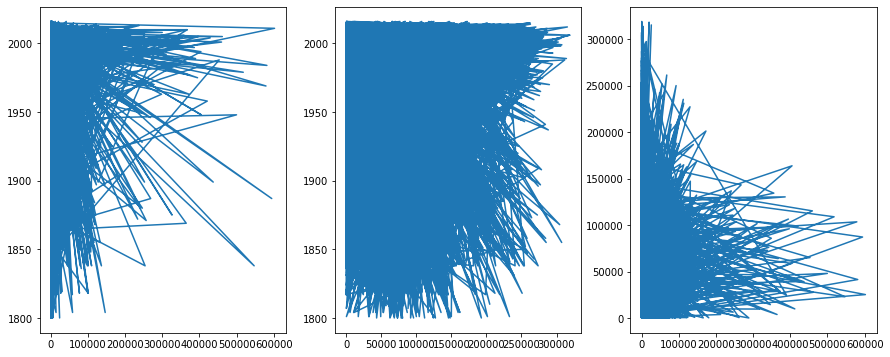

In [12]:
plt.rcParams['figure.figsize']=(15,6)
plt.subplot(1,3,1)
plt.plot(num_df['no_of_employees'],num_df['yr_of_estab'])
plt.subplot(1,3,2)
plt.plot(num_df['prevailing_wage'],num_df['yr_of_estab'])
plt.subplot(1,3,3)
plt.plot(num_df['no_of_employees'],num_df['prevailing_wage'])
plt.show()

##### Insight
- There is no linear realtion among two variables

In [13]:
from scipy.stats import spearmanr
from scipy.stats import pearsonr

def test_correlation(test_name,column1,column2):
    column1_to_test = num_df[column1]
    columns2_to_test = num_df[column2]
    stat ,p = test_name(column1_to_test,columns2_to_test)
    d = dict()
    d['col1'] = column1
    d['col2'] = column2
    if p>0.05:
        test_results.append('Independent Samples')
    else:
        test_results.append('Dependent Samples')
    columns_combination.append(d)

In [14]:
columns_combination = []
test_results = []
test_correlation(spearmanr,'no_of_employees','yr_of_estab')

In [15]:
test_correlation(spearmanr,'prevailing_wage','yr_of_estab')

In [16]:
test_correlation(spearmanr,'no_of_employees','prevailing_wage')

In [17]:
df_spearmanr = pd.DataFrame(columns_combination,test_results)
df_spearmanr

,col1,col2
Independent Samples,no_of_employees,yr_of_estab
Dependent Samples,prevailing_wage,yr_of_estab
Dependent Samples,no_of_employees,prevailing_wage


#### 2.5 pearsonr Test
- Ho : Independent Samples
- H1 : Dependent Samples

In [18]:
columns_combination=[]
test_results=[]
test_correlation(pearsonr,'no_of_employees','yr_of_estab')

In [19]:
test_correlation(pearsonr,'prevailing_wage','yr_of_estab')

In [20]:
test_correlation(pearsonr,'no_of_employees','prevailing_wage')

In [21]:
df_pearsonr = pd.DataFrame(columns_combination,test_results)
df_pearsonr

,col1,col2
Dependent Samples,no_of_employees,yr_of_estab
Dependent Samples,prevailing_wage,yr_of_estab
Independent Samples,no_of_employees,prevailing_wage


##### Result
- At 5% Significance Interval
- From Above spearmanr and pearsonr test
- preavailing_wage and yr_of_estab has correlation

In [22]:
cat_feat = [col for col in df.columns if df[col].dtype=='O']

In [23]:
cat_feat

['case_id',
 'continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

#### 2.6 Chi Square Test
* **Test whether two categorical features are dependent or not
* Here will test correlation of categorical features with Target Column
* Assumptions
 - All Are independent observations

In [25]:
from scipy.stats import chi2_contingency
chi2_squared_test = []
for feature in cat_feat:
    stat, p ,dof, expected = chi2_contingency(pd.crosstab(df['case_status'],df[feature]))
    if p> 0.05:
        chi2_squared_test.append('Independent Categories')
    else:
        chi2_squared_test.append('Dependent Categories')
        
result = pd.DataFrame(data=[cat_feat,chi2_squared_test]).T
result.columns = ['Columns','Hypothesis Result']
result

,Columns,Hypothesis Result
0,case_id,Independent Categories
1,continent,Dependent Categories
2,education_of_employee,Dependent Categories
3,has_job_experience,Dependent Categories
4,requires_job_training,Independent Categories
5,region_of_employment,Dependent Categories
6,unit_of_wage,Dependent Categories
7,full_time_position,Dependent Categories
8,case_status,Dependent Categories


##### Insight
* Here our Output is dependent on continent , edu_of_employ , job exp , full time positon

#### 2.7 Levene's Test
* **Equality of variance test**
- Ho : has_Job_exp yes/no have equal variance
- H1 : not equal variance


In [37]:
no_emp_var = scipy.stats.levene(df[df['has_job_experience']=='Y']['no_of_employees'],
                               df[df['has_job_experience']=='N']['no_of_employees'],center='mean')
yr_est_var = scipy.stats.levene(df[df['has_job_experience']=='Y']['yr_of_estab'],
                               df[df['has_job_experience']=='N']['yr_of_estab'],center='mean')

prevailin_wage_var = scipy.stats.levene(df[df['has_job_experience']=='Y']['prevailing_wage'],
                                       df[df['has_job_experience']=='N']['prevailing_wage'])

print("Test Statistic and p-value for no_of_employees  is", no_emp_var)
print('\n')
print("Test Statistic and p-value for yr_of_estab is", yr_est_var)
print('\n')
print("Test Statistic and p-value for prevailing_wage is", prevailin_wage_var)


Test Statistic and p-value for no_of_employees  is LeveneResult(statistic=1.220554351887921, pvalue=0.269262320693216)


Test Statistic and p-value for yr_of_estab is LeveneResult(statistic=1.9245800897564125, pvalue=0.1653647666617496)


Test Statistic and p-value for prevailing_wage is LeveneResult(statistic=113.0757327115288, pvalue=2.3588331663145362e-26)


##### Result
* Conclusion : Since , at 5% level of significance ,P(calculated) > P(0.05)
* Therefore we will accept the null hypothesis
* All the three num_feat have equal variance wrt has_job_exp

#### 2.8 Checking Correlation using Heatmap 

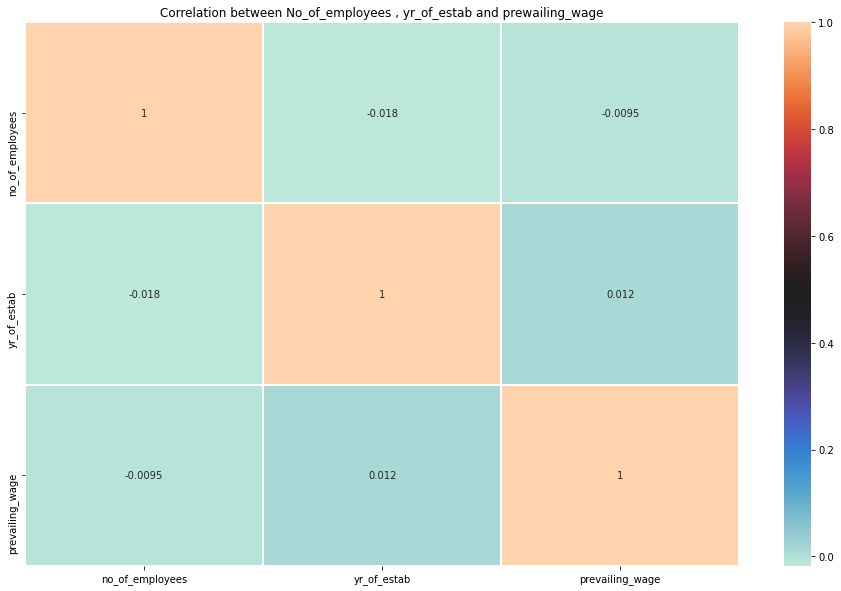

In [40]:
sns.heatmap(df.corr(),annot=True,cmap='icefire',linewidth=0.3)
fig = plt.gcf()
fig.set_size_inches(16,10)
plt.title('Correlation between No_of_employees , yr_of_estab and prewailing_wage',si)
plt.show()

### Checking for normal Distribution using Transformations
* Q-Q plot (to check if data is normally distributed)

<AxesSubplot: xlabel='prevailing_wage', ylabel='Density'>

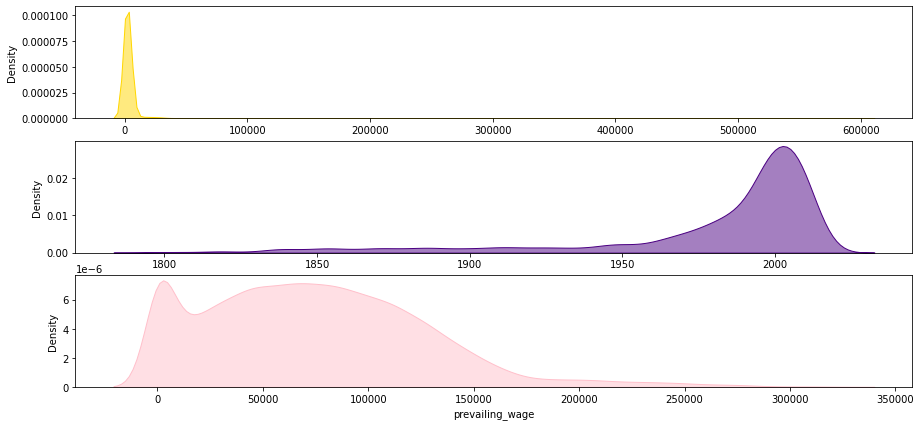

In [42]:
fig ,axes = plt.subplots(3,1,figsize=(15,7))

sns.kdeplot(df['no_of_employees'],shade=True,label = 'No of Employees',color='gold',ax=axes[0],alpha=0.5)
sns.kdeplot(df['yr_of_estab'],shade=True,label = 'Year of Est.',color='indigo',ax=axes[1],alpha=0.5)
sns.kdeplot(df['prevailing_wage'],shade=True,label = 'Prewailing Wage',color='pink',ax=axes[2],alpha=0.5)

#### 3.1 Log Transformation


#### 3.1 Box-Cox Transformation
* Assumption
  - your data must be positive

In [45]:
def plot_qq_plot(column):
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(df[column])
    plt.title("{} PDF".format(column))
    plt.subplot(122)
    stats.probplot(df[column],dist='norm',plot=plt)
    plt.title("{} QQ Plot".format(column))
    plt.show()

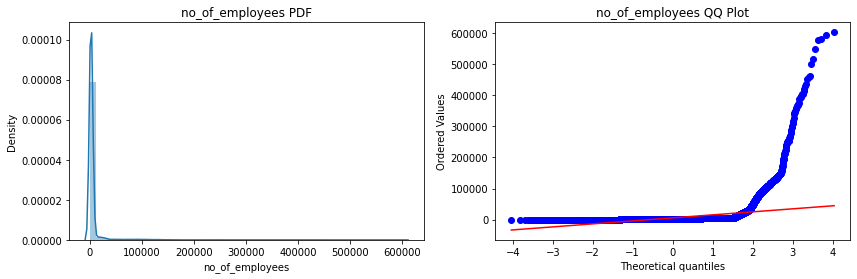

In [46]:
plot_qq_plot('no_of_employees')

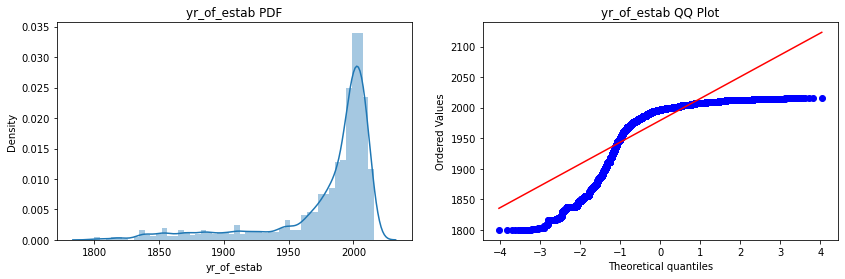

In [48]:
plot_qq_plot('yr_of_estab')

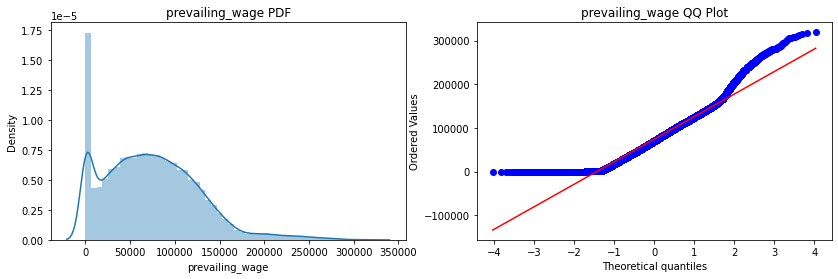

In [49]:
plot_qq_plot('prevailing_wage')